In [ ]:
# new plan: tts, smote on train, reg. kfold validation, also try current way side by side

# Import

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data
import pandas as pd
import numpy as np
import random as rnd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
data = pd.read_csv('HTRU_2.csv', names=['IP_mean', 'IP_deviation', 'IP_kurtosis', 'IP_skew', 'DMSNR_mean', 'DMSNR_deviation',
                                       'DMSNR_kurtosis', 'DMSNR_skew', 'Class'])

# Data Exploration

Column Headers

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

In [3]:
data

,IP_mean,IP_deviation,IP_kurtosis,IP_skew,DMSNR_mean,DMSNR_deviation,DMSNR_kurtosis,DMSNR_skew,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [4]:
# check class distribution

data['Class'].value_counts()

0    16259
1     1639
Name: Class, dtype: int64

Text(0.5, 1, 'Initial Data Summary')

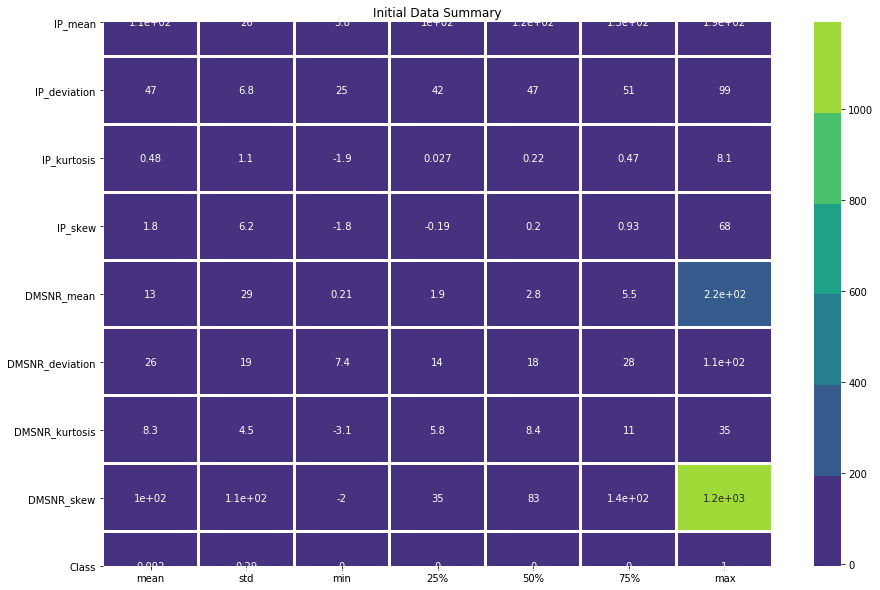

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(data.describe()[1:].transpose(),
           annot=True, linewidth=2, cmap=sns.color_palette('viridis'))

# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)
                                                           
plt.title('Initial Data Summary')

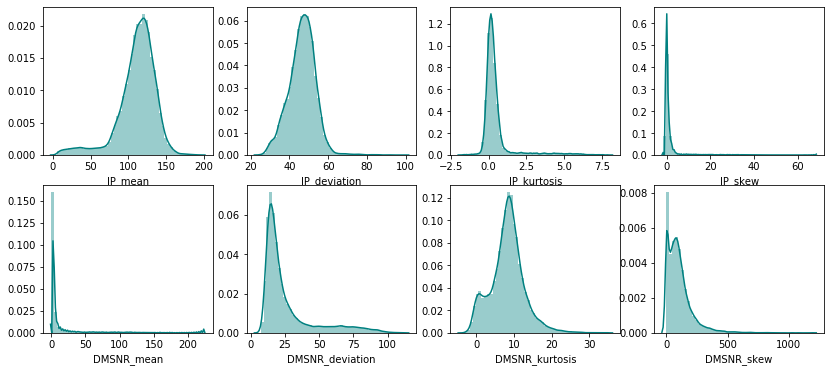

In [6]:
f, axes = plt.subplots(2, 4, figsize=(14, 6))
sns.distplot( data['IP_mean'] , color='teal', ax=axes[0, 0])
sns.distplot( data['IP_deviation'] , color='teal', ax=axes[0, 1])
sns.distplot( data['IP_kurtosis'] , color='teal', ax=axes[0, 2])
sns.distplot( data['IP_skew'] , color='teal', ax=axes[0, 3])
sns.distplot( data['DMSNR_mean'] , color='teal', ax=axes[1, 0])
sns.distplot( data['DMSNR_deviation'] , color='teal', ax=axes[1, 1])
sns.distplot( data['DMSNR_kurtosis'] , color='teal', ax=axes[1, 2])
sns.distplot( data['DMSNR_skew'] , color='teal', ax=axes[1, 3])

In [ ]:
data.dtypes

In [ ]:
sns.pairplot(data, hue='Class', vars= ['IP_mean', 'IP_deviation', 'IP_kurtosis', 'IP_skew', 'DMSNR_mean',
       'DMSNR_deviation', 'DMSNR_kurtosis', 'DMSNR_skew'])
plt.title('Pairplot by Class')
plt.show()

# Data Prep

In [ ]:
x = data[['IP_mean', 'IP_deviation', 'IP_kurtosis', 'IP_skew', 'DMSNR_mean',
       'DMSNR_deviation', 'DMSNR_kurtosis', 'DMSNR_skew']]
y = data['Class']

In [ ]:
# train test split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
# random undersampling to trim majority class

In [ ]:
# smote to compensate for the imbalance of my classes

#sm = SMOTE(random_state=2, ratio=1.0)
#xTrain, yTrain = sm.fit_sample(xTrain, yTrain)

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
x, y = pipeline.fit_resample(x, y)


In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Validation

In [ ]:
skf = KFold(n_splits=10)
skf.get_n_splits(X, Y)

def kfold(model, score_type) :
    kfold_scores = []
    
    for train_index, test_index in skf.split(X, Y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        clf = model()
        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)
        score = score_type(Y_test, Y_pred)
        kfold_scores.append(score)
        
    
    print(f'{score_type} mean score: {sum(kfold_scores)/len(kfold_scores)}')
          
    

# Modeling

In [ ]:
# parameters, lasso, ridge, get into those on all models, pruning, grid search, parameter tuning for each

# be able to desribe whihc metrics matter to me and why

# run ROC_AUC

In [ ]:
# Logisitc Regression

from sklearn.metrics import recall_score

lr = LogisticRegression()
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

lr_score = lr.score(X_test, Y_test)

recall_score(Y_test, Y_pred)

In [ ]:
kfold(LogisticRegression, recall_score)

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

svc_score = svc.score(X_test, Y_test)

recall_score(Y_test, Y_pred)

In [ ]:
# Naive Bayes

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

Y_pred = gnb.predict(X_test)

gnb_score = gnb.score(X_test, Y_test)

recall_score(Y_test, Y_pred)

In [ ]:
# KNN

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

knn_score = knn.score(X_test, Y_test)
recall_score(Y_test, Y_pred)


In [ ]:
# Linear SVC

lsvc = LinearSVC()
lsvc.fit(X_train, Y_train)

Y_pred = lsvc.predict(X_test)

lsvc_score = lsvc.score(X_test, Y_test)

recall_score(Y_test, Y_pred)

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)

sgd_score = sgd.score(X_test, Y_test)

recall_score(Y_test, Y_pred)

In [ ]:
# Decision Tree

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

Y_pred = dtc.predict(X_test)

dtc_score = dtc.score(X_test, Y_test)

recall_score(Y_test, Y_pred)

In [ ]:
# Random Forest

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

Y_pred = rfc.predict(X_test)

rfc_score = rfc.score(X_test, Y_test)

recall_score(Y_test, Y_pred)

# Model Examination

In [ ]:
# use recall score instead of accuracy score

In [ ]:
models = pd.DataFrame({'Model': ['Logistic Regression', 'Support Vector Machines', 'Naive Bayes','KNN', 
                                 'Linear SVC', 'Stochastic Gradient Decent', 'Decision Tree', 'Random Forest'], 
                       'Score' : [lr_score, svc_score, gnb_score, knn_score, lsvc_score, sgd_score,
                                 dtc_score, rfc_score]})

models['Score'] = round(models.Score * 100, 2)
models.sort_values(by='Score', ascending=False)

# Final Model

# Visualizations